In [1]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm

from Custom_Func import modularity, _one_level

## Sample Graph

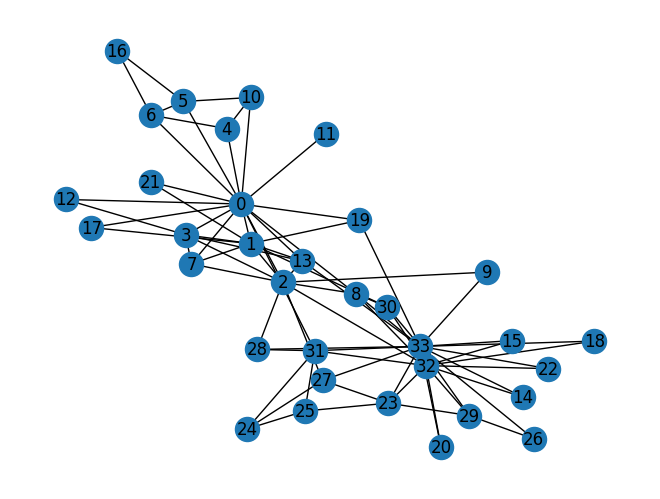

In [2]:
G = nx.karate_club_graph()
#visualize
nx.draw(G, with_labels=True)

## Louvain Method with Original Q (Modularity) Function

In [3]:
#Louvain with Normal Q 
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

Set 1: [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {8, 30}, {10, 4}, {16, 5, 6}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29}, {24, 25, 28, 31}]
Set 2: [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}, {24, 25, 28, 31}]


## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

[{0, 7}, {1, 21}, {2, 27}, {3, 13}, {10, 4}, {5, 6}, {8, 30}, {9}, {11}, {12}, {14}, {15}, {16}, {17}, {18}, {19}, {24, 31}, {25, 23}, {26, 29}, {28}, {32, 20}, {33, 22}]


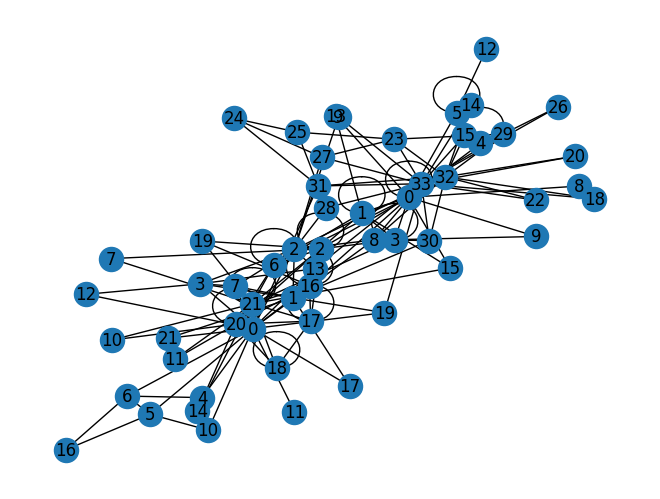

In [4]:
#Louvain with Custom Q (+1 for every community of size 2 / 0 else)
nx_quality.modularity=modularity
nx_comm.louvain._one_level=_one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#


    